# Importing some modules

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

tf.keras.backend.set_floatx('float64')
tf.random.set_seed(1)
np.random.seed(1)

# Retrieving data

In [2]:
from example import X, Y

print('data shape:', X.shape, Y.shape)

data shape: (1000,) (1000, 2)


In [3]:
# splitting the dataset into train and test parts

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.50,
                                                    random_state=0)
X_train.shape, y_test.shape

((500,), (500, 2))

# Build the model

In [4]:
model = Sequential()

model.add(Dense(10))
model.add(Activation('elu'))

model.add(Dense(10))
model.add(Activation('elu'))

# final layer: a neuron with linear activation acts like a summation operator.
model.add(Dense(2))

opt = optimizers.Adam()
loss = tf.keras.losses.MeanSquaredError(name='loss')

model.compile(optimizer=opt, loss=loss, metrics=['mae'])

In [5]:
# training options

# https://keras.io/api/callbacks/early_stopping/
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

# fit options
params = dict(epochs=100,
              batch_size=2,
              verbose=2,
              validation_split=0.2,
              callbacks=[early_stopping])

In [6]:
# train the model

history = model.fit(X_train, y_train, **params)

Epoch 1/100
200/200 - 1s - loss: 17.0532 - mae: 2.8649 - val_loss: 11.6294 - val_mae: 2.4593
Epoch 2/100
200/200 - 0s - loss: 8.1972 - mae: 1.8353 - val_loss: 3.8734 - val_mae: 1.2438
Epoch 3/100
200/200 - 0s - loss: 3.5333 - mae: 1.1083 - val_loss: 2.3817 - val_mae: 0.9890
Epoch 4/100
200/200 - 0s - loss: 2.6836 - mae: 0.9915 - val_loss: 2.0013 - val_mae: 0.9081
Epoch 5/100
200/200 - 0s - loss: 2.2449 - mae: 0.8907 - val_loss: 1.6611 - val_mae: 0.8190
Epoch 6/100
200/200 - 0s - loss: 1.8711 - mae: 0.7902 - val_loss: 1.4632 - val_mae: 0.7819
Epoch 7/100
200/200 - 0s - loss: 1.5695 - mae: 0.7365 - val_loss: 1.1097 - val_mae: 0.6533
Epoch 8/100
200/200 - 0s - loss: 1.2980 - mae: 0.6540 - val_loss: 0.8992 - val_mae: 0.5711
Epoch 9/100
200/200 - 0s - loss: 1.0875 - mae: 0.5817 - val_loss: 0.7836 - val_mae: 0.5305
Epoch 10/100
200/200 - 0s - loss: 0.9001 - mae: 0.5263 - val_loss: 0.5876 - val_mae: 0.4373
Epoch 11/100
200/200 - 0s - loss: 0.7537 - mae: 0.4644 - val_loss: 0.4849 - val_mae: 0.

200/200 - 0s - loss: 0.0058 - mae: 0.0521 - val_loss: 0.0022 - val_mae: 0.0369
Epoch 91/100
200/200 - 0s - loss: 0.0034 - mae: 0.0446 - val_loss: 0.0034 - val_mae: 0.0453
Epoch 92/100
200/200 - 0s - loss: 0.0036 - mae: 0.0458 - val_loss: 0.0041 - val_mae: 0.0478
Epoch 93/100
200/200 - 0s - loss: 0.0038 - mae: 0.0454 - val_loss: 0.0025 - val_mae: 0.0396
Epoch 94/100
200/200 - 0s - loss: 0.0039 - mae: 0.0436 - val_loss: 0.0020 - val_mae: 0.0353
Epoch 95/100
200/200 - 0s - loss: 0.0076 - mae: 0.0543 - val_loss: 0.0042 - val_mae: 0.0429
Epoch 96/100
200/200 - 0s - loss: 0.0030 - mae: 0.0403 - val_loss: 0.0020 - val_mae: 0.0359
Epoch 97/100
200/200 - 0s - loss: 0.0032 - mae: 0.0415 - val_loss: 0.0018 - val_mae: 0.0325
Epoch 98/100
200/200 - 0s - loss: 0.0032 - mae: 0.0421 - val_loss: 0.0051 - val_mae: 0.0479
Epoch 99/100
200/200 - 0s - loss: 0.0035 - mae: 0.0428 - val_loss: 0.0026 - val_mae: 0.0370
Epoch 100/100
200/200 - 0s - loss: 0.0032 - mae: 0.0404 - val_loss: 0.0024 - val_mae: 0.0347


# Model accuracy with MAE

In [7]:
p = model.predict(X_test)
mae_test = tf.keras.losses.mean_absolute_error(y_test, p).numpy().mean()

p = model.predict(X_train)
mae_train = tf.keras.losses.mean_absolute_error(y_train, p).numpy().mean()

print('MAE for training set: %.2e' % mae_train)
print('MAE for test     set: %.2e' % mae_test)

MAE for training set: 3.70e-02
MAE for test     set: 3.84e-02


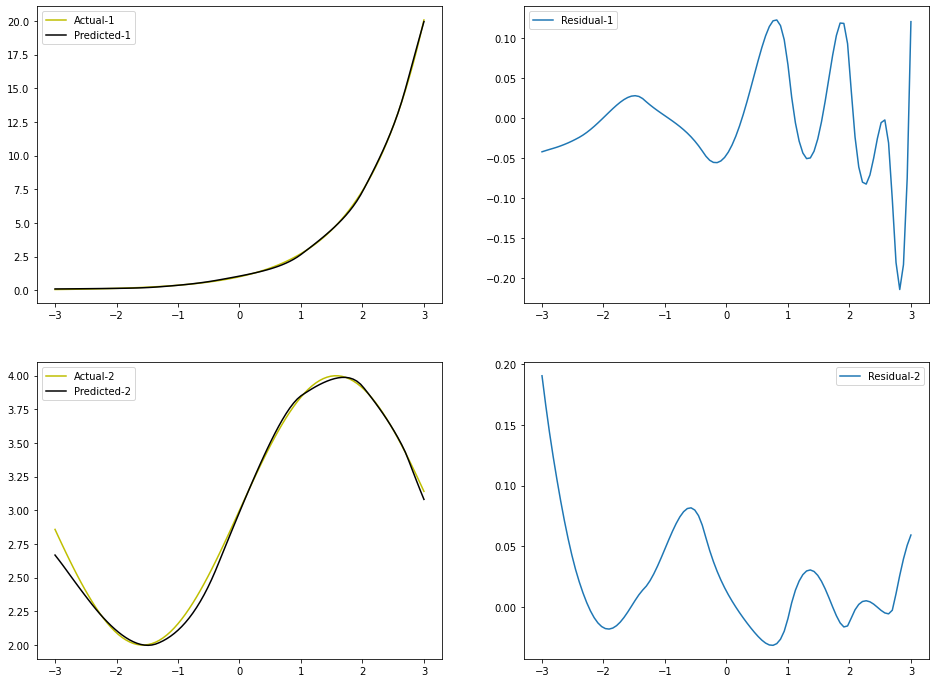

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

from example import a, b, f

xx = np.linspace(a, b, 100)
yy = f(xx)
pp = model.predict(xx.reshape(-1, 1)).T

axs[0,0].plot(xx, yy[0,:], 'y-', label='Actual-1')
axs[0,0].plot(xx, pp[0,:], 'k-', label='Predicted-1')

axs[0,1].plot(xx, yy[0,:] - pp[0,:], label='Residual-1')

axs[1,0].plot(xx, yy[1,:], 'y-', label='Actual-2')
axs[1,0].plot(xx, pp[1,:], 'k-', label='Predicted-2')

axs[1,1].plot(xx, yy[1,:] - pp[1,:], label='Residual-2')

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

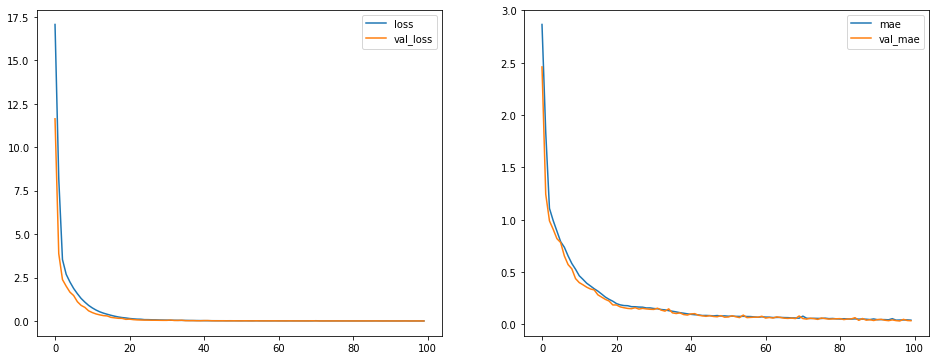

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history['mae']
val_mae = history.history['val_mae']

ax1.plot((loss), label='loss')
ax1.plot((val_loss), label='val_loss')
ax1.legend()

ax2.plot((mae), label='mae')
ax2.plot((val_mae), label='val_mae')
ax2.legend()